# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
import pandas as pd

In [2]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [24]:
vocabulario = set()
for doc in documents:
    for word in doc.lower().strip(".").split():
        vocabulario.add(word)
print(len(vocabulario))

20


In [ ]:
dict_tf = {}
i = 0
for doc in documents:
    dict_tfd = {}
    for term in vocabulario:
        count = doc.lower().count(term)
        dict_tfd[term] = count
    print(doc, dict_tfd)
    dict_tf[i] = dict_tfd
    i += 1
print(dict_tf)
        

El gato se escondió debajo de la cama. {'estaba': 0, 'del': 0, 'la': 1, 'jugaron': 0, 'en': 0, 'debajo': 1, 'cama': 1, 'jardín': 0, 'el': 1, 'se': 1, 'y': 0, 'importante': 0, 'escondió': 1, 'es': 1, 'de': 2, 'limpieza': 0, 'cómoda': 0, 'gato': 1, 'perro': 0, 'limpia': 0}
La cama estaba limpia y cómoda. {'estaba': 1, 'del': 0, 'la': 1, 'jugaron': 0, 'en': 0, 'debajo': 0, 'cama': 1, 'jardín': 0, 'el': 0, 'se': 0, 'y': 1, 'importante': 0, 'escondió': 0, 'es': 1, 'de': 0, 'limpieza': 0, 'cómoda': 1, 'gato': 0, 'perro': 0, 'limpia': 1}
El perro y el gato jugaron en el jardín. {'estaba': 0, 'del': 0, 'la': 0, 'jugaron': 1, 'en': 1, 'debajo': 0, 'cama': 0, 'jardín': 1, 'el': 3, 'se': 0, 'y': 1, 'importante': 0, 'escondió': 0, 'es': 0, 'de': 0, 'limpieza': 0, 'cómoda': 0, 'gato': 1, 'perro': 1, 'limpia': 0}
La limpieza del jardín es importante. {'estaba': 0, 'del': 1, 'la': 1, 'jugaron': 0, 'en': 0, 'debajo': 0, 'cama': 0, 'jardín': 1, 'el': 1, 'se': 0, 'y': 0, 'importante': 1, 'escondió': 0, 

In [34]:
matriz = pd.DataFrame(dict_tf)
matriz.to_csv("matriz.csv", index=True)

In [44]:
from sklearn.decomposition import PCA
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)

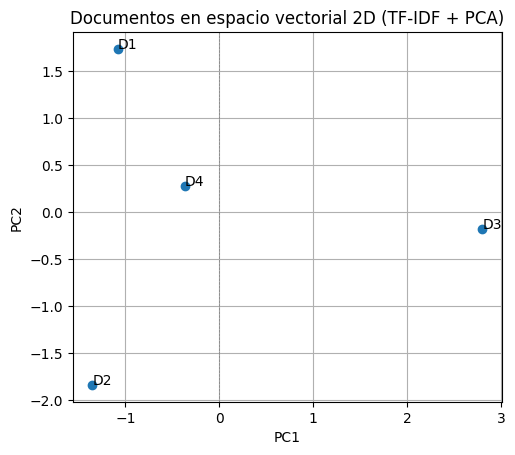

In [48]:
import matplotlib.pyplot as plt
plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


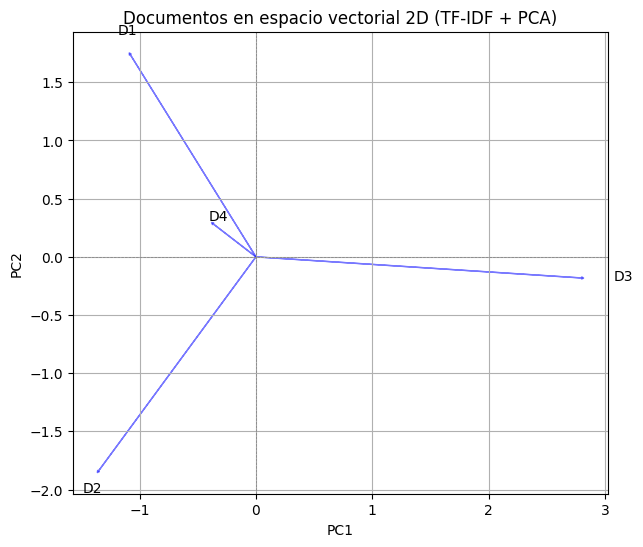

In [ ]:
plt.figure(figsize=(10, 6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width = 0.02 , head_length = 0.02, fc='blue', ec='blue', alpha=0.5)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\wilso\AppData\Local\Temp\ipykernel_18532\4085005308.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_docs, df_consulta], ignore_index=True)


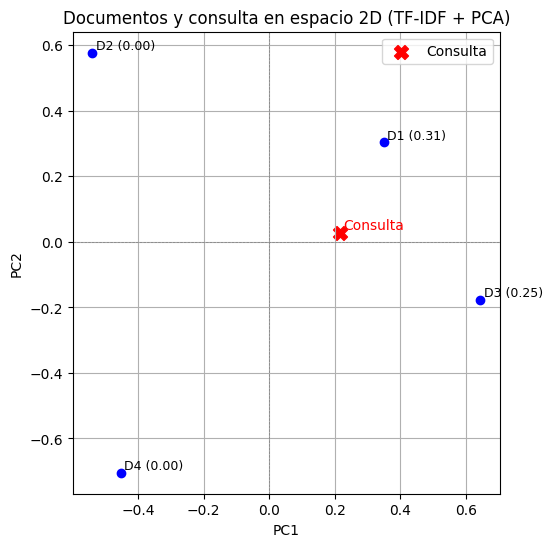

In [4]:
# Corpus
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# 1. Vectorización TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 2. PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(tfidf_matrix.toarray())

# 3. Crear DataFrame con coordenadas PCA
df_docs = pd.DataFrame(docs_2d, columns=["PC1", "PC2"])
df_docs["Documento"] = [f"D{i+1}" for i in range(len(documents))]

# 4. Ingresar consulta
consulta = input("Ingresa una consulta: ")

# 5. Vectorizar y proyectar la consulta al mismo espacio
consulta_vec = vectorizer.transform([consulta])
consulta_2d = pca.transform(consulta_vec.toarray())[0]

# 6. Calcular similitud coseno
similitudes = cosine_similarity(consulta_vec, tfidf_matrix).flatten()
df_docs["Similitud_Coseno"] = similitudes

# 7. Crear DataFrame para la consulta
df_consulta = pd.DataFrame([{
    "PC1": consulta_2d[0],
    "PC2": consulta_2d[1],
    "Documento": "Consulta",
    "Similitud_Coseno": None
}])

# 8. Unir ambos para graficar
df_all = pd.concat([df_docs, df_consulta], ignore_index=True)

# 9. Visualización
plt.figure(figsize=(10, 6))
for i, row in df_docs.iterrows():
    plt.scatter(row["PC1"], row["PC2"], color="blue")
    plt.text(row["PC1"] + 0.01, row["PC2"] + 0.01, f'{row["Documento"]} ({row["Similitud_Coseno"]:.2f})', fontsize=9)

# Dibuja la consulta
plt.scatter(df_consulta["PC1"], df_consulta["PC2"], color="red", marker="X", s=100, label="Consulta")
plt.text(df_consulta["PC1"].values[0] + 0.01, df_consulta["PC2"].values[0] + 0.01, "Consulta", fontsize=10, color="red")

plt.title("Documentos y consulta en espacio 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# === FUNCIONES ===

def buscar_documentos_relevantes(consulta: str, vectorizer, tfidf_matrix, documentos, top_n=3):
    """Devuelve los documentos más relevantes a una consulta, ordenados por similitud coseno."""
    consulta_vec = vectorizer.transform([consulta])
    similitudes = cosine_similarity(consulta_vec, tfidf_matrix).flatten()
    resultados = pd.DataFrame({
        "Documento": documentos,
        "Similitud": similitudes
    }).sort_values(by="Similitud", ascending=False)
    return resultados.head(top_n), consulta_vec

def graficar_vectores_pca(tfidf_matrix, consulta_vec, documentos, pca):
    """Proyecta documentos y consulta con PCA y dibuja sus vectores desde el origen."""
    docs_2d = pca.transform(tfidf_matrix.toarray())
    consulta_2d = pca.transform(consulta_vec.toarray())[0]

    plt.figure(figsize=(8, 6))

    # Flechas para documentos
    for i, (x, y) in enumerate(docs_2d):
        plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='blue', alpha=0.6)
        plt.text(x*1.05, y*1.05, f"D{i+1}", fontsize=10, color='blue')

    # Flecha para la consulta
    plt.arrow(0, 0, consulta_2d[0], consulta_2d[1], head_width=0.04, head_length=0.04, color='red', linewidth=2)
    plt.text(consulta_2d[0]*1.05, consulta_2d[1]*1.05, "Consulta", fontsize=12, color='red')

    plt.title("Vectores en espacio PCA (TF-IDF)", fontsize=14)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()



Documentos más relevantes:
  Documento  Similitud
0        D1   0.314806
2        D3   0.251368
1        D2   0.000000


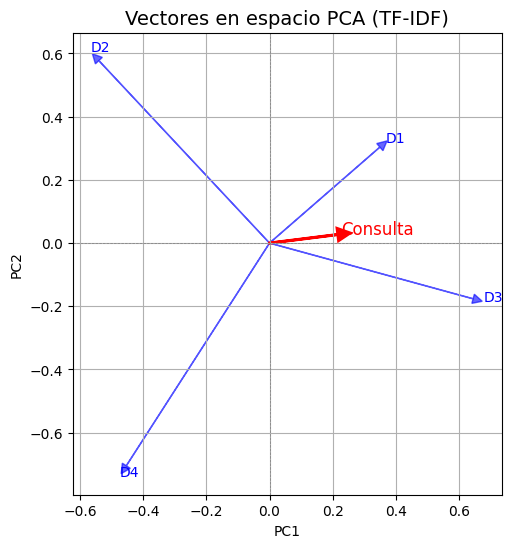

In [15]:
# Consulta del usuario
consulta = input("Ingresa una consulta: ")

# Buscar documentos relevantes
top_resultados, consulta_vec = buscar_documentos_relevantes(
    consulta=consulta,
    vectorizer=vectorizer,
    tfidf_matrix=tfidf_matrix,
    documentos=[f"D{i+1}" for i in range(len(documents))],
    top_n=3
)

print("\nDocumentos más relevantes:")
print(top_resultados)

# Visualizar vectores
graficar_vectores_pca(tfidf_matrix, consulta_vec, documents, pca)
